In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import mglearn
%matplotlib inline

### 서포트 벡터 머신

#### 선형 모델과 비선형 특성

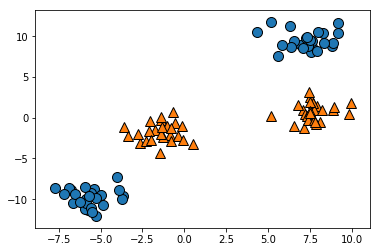

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y %= 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

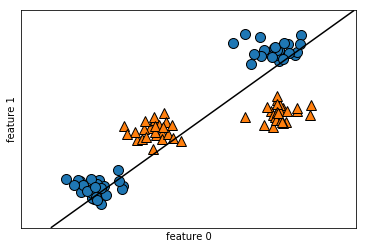

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터 셋에서는 잘 들어 맞지 않는다
+ 두번째 특성을 제곱한 데이터를 추가

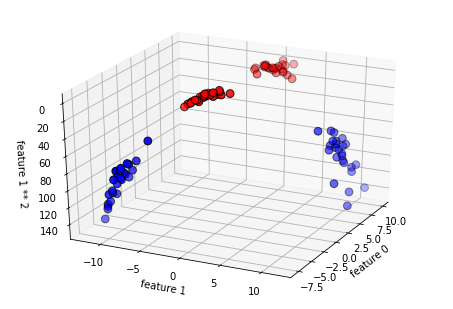

In [4]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

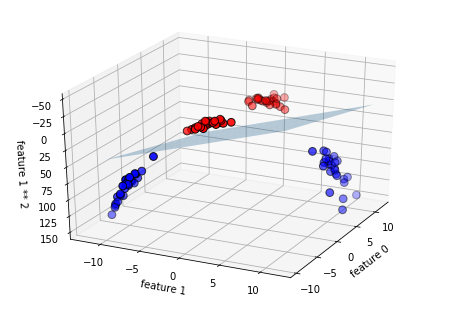

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

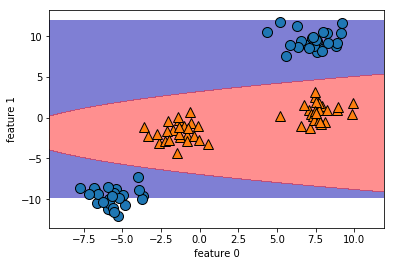

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

#### 커널 기법
+ 새로운 특성을 만들지 않고 고차원 분류기를 학습시키는 방법

+ 데이터 특성이 많은 경우 어떤 특성을 수정할지 모르고 연산 비용이 커짐
+ 서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 방법
  + 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산 하는 다항식 커널
  + 가우시안 커널
    + 차원이 무한한 특성 공간에 매핑하는 것(모든 차수의 모든 다항식을 고려하는 방법 -> 지수함수의 테일러 급수 전개 때문)
  + 시그모이드 커널

#### SVM 이해하기
+ 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 줌
+ 두 클래스 사이의 경계에 위치한 데이터 포인트 : 서포트 벡터
+ 새로운 데이터 포인트에 대해 예특하려면 각 서포트 벡터와의 거리를 측정함
  + 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산됨($k_{rbf}(x_1, x_2) = e^{(-\gamma \|x_1 - x_2\|^2)}$
  + $\|x_1 - x_2\|$는 유클리디안 거리 $\gamma$는 가우시안 커널의 폭을 제어하는 매개변수

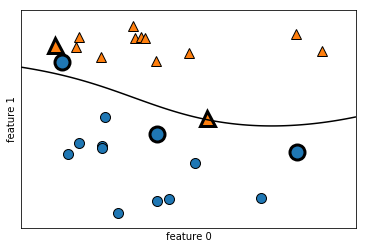

In [22]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [ ]:
####